In [1]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt


In [2]:
# Use this parameter to set printing behavior
verbose = True

In [3]:
# Compute Manhattan distance between two points.
def taxicab(tup1, tup2):
    dist = 0
    
    for i in range(len(tup1)-1):
        dist = dist + abs(tup1[i]-tup2[i])
    return dist

# Compute L2 distance between two points
def lineardist(tup1,tup2):
    dist = np.linalg.norm(np.subtract(tup1,tup2))
    return dist

In [4]:
#Median Uber user has an income of approximately $71,000
#40% of Uber passengers make at least $100,000
#from http://uctc.net/research/papers/UCTC-FR-2014-08.pdf
#approximate user distribution of incomes in 2014 was:

uberIncomesRaw = [25.0, 50.0, 85.0, 150.0, 300.0, 600.0]
uberIncomesDistRaw = [8.0,23.0,18.0,27.0,9.0, 2.0] 
#note that this doesn't sum to 100, because about 20% of uber drivers
#declined to share their income with the surveyors
#uberIncomes = np.subtract(uberIncomesRaw, [24.0,24.0,24.0,24.0,24.0,24.0])
uberIncomes = uberIncomesRaw/(np.ones(len(uberIncomesRaw))*3.0*30)
#dividing by 3 roughly approximates hourly values of time? 
#dividing by 30 roughly approximates minutes/mile? tbd 
#Roughly? worth thinking about the right value here
#result is disposable income

uberIncomesDist = uberIncomesDistRaw/np.sum(uberIncomesDistRaw)
#probabilities sum to 1

print np.sum(uberIncomesDist)

#Estimated car value of time to be 15K
carCost = 15/(3.0*30)

1.0


In [5]:
# Compute n destinations with expected L2 distance stdev from (x,y)
def destinations(n,stdev,x, y):
    dests = []
    #dests.append(tuple([0,0,0.0]))
    for i in range(n):
        dests.append(tuple(np.append(stdev*np.random.randn(2) + [x,y],(i+1))))
    return dests

# 1: randint could give you the value zero?
# Re: 1: Distribution choice is somewhat arbitrary.
#        See above definition of UberIncomesDist
# 2: Do you want np.random.uniform(size=n)?
# Re: 2: No, we would like something representative.
#        We might try various distributions.
# 3: Do you want to just have a sequence of times (i/n)
# Re: 3: I'm not sure what this means, but, I don't think so
#        In particular, we want some variation.
def timevals(n):
    #values = np.random.randint(100,size = n)
    values = np.random.choice(uberIncomes,n,p=uberIncomesDist)
    values = np.append(carCost, values)
    #carCost is the cost (in $ Thousands) of the car's time per year
    #accounts for carbon usage, car wear, etc.
    #should be lower than min(uberIncomes)
    #return values/np.mean(values)

    #for now, we are normalizing. In the future we may not wish to.
    return values
# Deprecated    
# A zero and then n ones.
#def dummytimeval(n):
#    #return np.append(,np.ones(n))
#    #median user value is 71
#    #may be appropriate to have:
#    values = np.append(carCost, 71*np.ones(n))
#    return values/np.mean(values)
    


In [6]:
dests = destinations(3,1,5,5)
riders = 3
dests1 = []

dests1.append(tuple([0,0,0.0]))
for x in dests:
    dests1.append(x)


print dests1
perms = it.permutations(dests)
permlist = []
for x in perms:
    permlist.append(x)
    

permlist1 = []
for x in permlist:
    newpath = []
    newpath.append(tuple([0,0,0.0]))
    for j in x:
        newpath.append(j)
    permlist1.append(newpath)
    

[(0, 0, 0.0), (5.050939553319874, 4.1999661074445678, 1.0), (4.8767486737229211, 3.3841647041558813, 2.0), (6.7785132990439267, 4.5073821130292311, 3.0)]


In [7]:
A = len(dests1)
distMatrix = np.ndarray((A, A))

for i in range(len(distMatrix)):
    for j in range(len(distMatrix[i])):
        distMatrix[i][j] = lineardist(dests1[i],dests1[j])
    
print distMatrix
        

[[ 0.          6.64467499  6.26380462  8.67552512]
 [ 6.64467499  0.          1.30225742  2.66064196]
 [ 6.26380462  1.30225742  0.          2.42452594]
 [ 8.67552512  2.66064196  2.42452594  0.        ]]


In [8]:
if verbose:
    for x in permlist: 
        print x

((5.050939553319874, 4.1999661074445678, 1.0), (4.8767486737229211, 3.3841647041558813, 2.0), (6.7785132990439267, 4.5073821130292311, 3.0))
((5.050939553319874, 4.1999661074445678, 1.0), (6.7785132990439267, 4.5073821130292311, 3.0), (4.8767486737229211, 3.3841647041558813, 2.0))
((4.8767486737229211, 3.3841647041558813, 2.0), (5.050939553319874, 4.1999661074445678, 1.0), (6.7785132990439267, 4.5073821130292311, 3.0))
((4.8767486737229211, 3.3841647041558813, 2.0), (6.7785132990439267, 4.5073821130292311, 3.0), (5.050939553319874, 4.1999661074445678, 1.0))
((6.7785132990439267, 4.5073821130292311, 3.0), (5.050939553319874, 4.1999661074445678, 1.0), (4.8767486737229211, 3.3841647041558813, 2.0))
((6.7785132990439267, 4.5073821130292311, 3.0), (4.8767486737229211, 3.3841647041558813, 2.0), (5.050939553319874, 4.1999661074445678, 1.0))


In [9]:
vals = timevals(3)

#"""#Deprecated

#dummyvals = dummytimeval(3)
#if verbose:
#    print dummyvals
#"""


In [10]:
#The cost function accounts for individuals exiting the uber

def cost(weights, path, startx, starty):
    origin = tuple([startx,starty, 0])
    currloc = origin
    currcost = sum(weights)
    totalcost = 0
    for i in range(len(path)):
        
        #totalcost += currcost * taxicab(currloc,path[i])
        totalcost += currcost * lineardist(currloc,path[i])
        #if i > 0:
        print path[i][2]
        currcost = currcost-weights[path[i][2]]
        currloc = path[i]
        #print currcost
        #print weights
    return totalcost

def costMat(weights, path, distances):
    currloc = path[0]
    currcost = 0
    for x in path:
        currcost += weights[x[2]]
        #print x[2]
    #currcost = sum(weights)
    totalcost = 0
    for i in range(len(path)):
        #print i
        #print path[i]
        totalcost += currcost * distances[currloc[2]][path[i][2]]
        if i > 0:
            currcost = currcost - weights[path[i][2]]
        currloc = path[i]
    return totalcost

#The envCost function computes the total length of a given path; presumably 
#this is proportional to the environmental and capital costs of a route
def envCost(weights, path, startx, starty):
    #Note that "weights" is unused, and may be removed from this function's arguments
    origin = tuple([startx, starty, 0])
    currloc = origin
    #currcost = 1
    currcost = carCost
    totalcost = 0
    for i in range(len(path)):
        totalcost += currcost * lineardist(currloc, path[i])
        currloc = path[i]
    return totalcost

def envCostMat(path, distances):
    currloc = path[0]
    currcost = carCost
    totalcost = 0
    for i in range(len(path)):
        if i > 0:
            totalcost += currcost * distances[currloc[2]][path[i][2]]
            currloc = path[i]
    return totalcost

#def indivCost(weights, path, startx, starty):
    


In [11]:
def indivCostMat(weights, path, distances):
    numPeople = len(weights)
    costs = np.zeros(numPeople)
    currloc = path[0]
    #currcost = sum(weights)
    totalcost = 0
    inCar = set()
    inCar.add(0)
    for n in range(len(path)):
        inCar.add(path[n][2])
    for i in range(len(path)):
        for j in inCar:
            costs[j] += weights[j]*distances[currloc[2]][path[i][2]]
            
        if i > 0:
            inCar.remove(path[i][2])
        currloc = path[i]
    return costs


def indivTimeCostMat(path, distances):
    numPeople = riders+1 
    costs = np.zeros(numPeople)
    currloc = path[0]
    #currcost = sum(weights)
    totalcost = 0
    inCar = set()
    inCar.add(0)
    for n in range(len(path)):
        inCar.add(path[n][2])
    for i in range(len(path)):
        for j in inCar:
            costs[j] += distances[currloc[2]][path[i][2]]
            
        if i > 0:
            inCar.remove(path[i][2])
        currloc = path[i]
    return costs
#def indivCostWithout(weights, )

In [12]:
print permlist1[1]
print permlist[1]

#print envCost(vals,permlist[1],0,0)
#print envCostMat(permlist1[1],distMatrix)
print indivCostMat(vals, permlist1[1],distMatrix)
print costMat(vals,permlist1[1],distMatrix)
#print cost(vals, permlist[1],0,0)

[(0, 0, 0.0), (5.050939553319874, 4.1999661074445678, 1.0), (6.7785132990439267, 4.5073821130292311, 3.0), (4.8767486737229211, 3.3841647041558813, 2.0)]
((5.050939553319874, 4.1999661074445678, 1.0), (6.7785132990439267, 4.5073821130292311, 3.0), (4.8767486737229211, 3.3841647041558813, 2.0))
[  1.95497381   1.84574305  78.19895259  15.50886158]
97.5085310381


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [13]:

wgtcost = []
unwgtcost = []

for i in range(len(permlist)):
    wgtcost.append(cost(vals,permlist[i],0,0))
    unwgtcost.append(envCost(vals,permlist[i],0,0))
    
wgtcost1 = []
unwgtcost1 = []
for i in range(len(permlist1)):
    wgtcost1.append(costMat(vals,permlist1[i],distMatrix))
    unwgtcost1.append(envCostMat(permlist1[i],distMatrix))

1.0
2.0
3.0
1.0
3.0
2.0
2.0
1.0
3.0
2.0
3.0
1.0
3.0
1.0
2.0
3.0
2.0
1.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [14]:
optimal =  wgtcost.index(min(wgtcost))
shortest =  unwgtcost.index(min(unwgtcost))
print wgtcost[optimal]/wgtcost[shortest]


optimal1 = wgtcost1.index(min(wgtcost1))
shortest1 = unwgtcost1.index(min(unwgtcost1))
print wgtcost1[optimal1]/wgtcost1[shortest1]

0.978819413466
0.978819413466


In [15]:
riders = 3
dispersion = 3 #unused
centerx = 6
centery = 6

In [16]:
output = []
socialcost = []
for j in range(3,20):
    dispersion = j
    savings = []
    unsavings = []
    for i in range(100):
        perms = it.permutations(destinations(riders,dispersion,centerx,centery))
        lst = list(perms)
        np.random.shuffle(lst)
    
        #To reduce computation time in the case of a large number of riders,
        #We simply look at some large subset of paths instead of the entire space
        #Obviously this isn't great in the worst case, but it is good in the average case
        if riders > 5:
            lst = lst[:120]
        permlist = []
        for x in lst:
            permlist.append(x)

        vals = timevals(riders)
        #dummyvals = dummytimeval(riders)
        #print dummyvals
        wgtcost = []
        unwgtcost = []

        for i in range(len(permlist)):
            wgtcost.append(cost(vals,permlist[i],0,0))
            unwgtcost.append(envCost(vals,permlist[i],0,0))

        optimal =  wgtcost.index(min(wgtcost))
        #lindist = unwgtcost.index(min(wgtcost))
        shortest =  unwgtcost.index(min(unwgtcost))
        savings.append(wgtcost[optimal]/wgtcost[shortest])
        unsavings.append(unwgtcost[optimal]/unwgtcost[shortest])
        #Note that there was a bug in the previous line in the first version 
        
    output.append(np.mean(savings))
    socialcost.append(np.mean(unsavings))

3.0
2.0
1.0
2.0
3.0
1.0
3.0
1.0
2.0
2.0
1.0
3.0
1.0
3.0
2.0
1.0
2.0
3.0
1.0
2.0
3.0
3.0
2.0
1.0
2.0
1.0
3.0
3.0
1.0
2.0
2.0
3.0
1.0
1.0
3.0
2.0
3.0
2.0
1.0
1.0
2.0
3.0
2.0
1.0
3.0
1.0
3.0
2.0
2.0
3.0
1.0
3.0
1.0
2.0
2.0
3.0
1.0
1.0
3.0
2.0
2.0
1.0
3.0
1.0
2.0
3.0
3.0
2.0
1.0
3.0
1.0
2.0
3.0
1.0
2.0
2.0
1.0
3.0
3.0
2.0
1.0
2.0
3.0
1.0
1.0
2.0
3.0
1.0
3.0
2.0
3.0
2.0
1.0
2.0
3.0
1.0
3.0
1.0
2.0
1.0
3.0
2.0
1.0
2.0
3.0
2.0
1.0
3.0
1.0
3.0
2.0
3.0
1.0
2.0
2.0
3.0
1.0
2.0
1.0
3.0
1.0
2.0
3.0
3.0
2.0
1.0
2.0
3.0
1.0
2.0
1.0
3.0
1.0
3.0
2.0
3.0
1.0
2.0
1.0
2.0
3.0
3.0
2.0
1.0
2.0
3.0
1.0
3.0
2.0
1.0
3.0
1.0
2.0
1.0
3.0
2.0
1.0
2.0
3.0
2.0
1.0
3.0
2.0
1.0
3.0
3.0
1.0
2.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.0
3.0
2.0
1.0
2.0
3.0
2.0
3.0
1.0
3.0
2.0
1.0
1.0
3.0
2.0
3.0
1.0
2.0
2.0
3.0
1.0
3.0
2.0
1.0
2.0
1.0
3.0
1.0
2.0
3.0
1.0
2.0
3.0
2.0
3.0
1.0
1.0
3.0
2.0
3.0
1.0
2.0
2.0
1.0
3.0
3.0
2.0
1.0
3.0
2.0
1.0
1.0
3.0
2.0
3.0
1.0
2.0
1.0
2.0
3.0
2.0
1.0
3.0
2.0
3.0
1.0
1.0
2.0
3.0
3.0
1.0
2.0
3.0
2.0
1.0
2.0
3.0
1.0
1.0
3.0
2.0
2.0
1.0
3.0
2.0
1.0
3.0
3.0
1.0
2.0
1.0
3.0
2.0
2.0
3.0
1.0
3.0
2.0
1.0
1.0
2.0
3.0
2.0
1.0
3.0
1.0
2.0
3.0
2.0
3.0
1.0
1.0
3.0
2.0
3.0
1.0
2.0
3.0
2.0
1.0
3.0
1.0
2.0
1.0
3.0
2.0
2.0
1.0
3.0
2.0
3.0
1.0
1.0
2.0
3.0
3.0
2.0
1.0
1.0
2.0
3.0
1.0
3.0
2.0
3.0
2.0
1.0
2.0
3.0
1.0
3.0
1.0
2.0
2.0
1.0
3.0
3.0
2.0
1.0
1.0
3.0
2.0
1.0
2.0
3.0
2.0
3.0
1.0
3.0
1.0
2.0
2.0
1.0
3.0
2.0
1.0
3.0
1.0
3.0
2.0
1.0
2.0
3.0
2.0
3.0
1.0
3.0
2.0
1.0
3.0
1.0
2.0
1.0
2.0
3.0
2.0
1.0
3.0
2.0
3.0
1.0
1.0
3.0
2.0
3.0
2.0
1.0
3.0
1.0
2.0
3.0
2.0
1.0
2.0
1.0
3.0
1.0
2.0
3.0
3.0
1.0
2.0
1.0
3.0
2.0
2.0
3.0
1.0
1.0
3.0
2.0
2.0
1.0
3.0
1.0
2.0
3.0
2.0
3.0
1.0
3.0
2.0
1.0
3.0
1.0
2.0
1.0
3.0
2.0
2.0


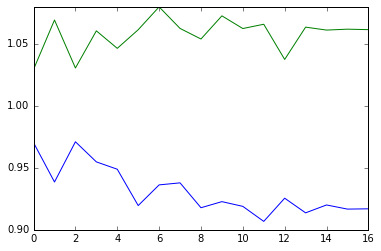

In [17]:
%matplotlib inline

#print np.mean(savings)
plt.plot(output)
plt.plot(socialcost)

The following method does the same thing with a distance matrix

In [18]:
riders = 5
dispersion = 3 #unused
centerx = 6
centery = 6

output1 = []
socialcost1 = []
for j in range(3,20):
    dispersion = j
    savings = []
    unsavings = []
    for i in range(100):
        #Build distance matrix
        dests = destinations(riders,dispersion,centerx,centery)
        dests1 = []
        dests1.append(tuple([0,0,0.0]))
        for x in dests:
            dests1.append(x)
        A = len(dests1)
        distMatrix = np.ndarray((A, A))

        for i in range(len(distMatrix)):
            for j in range(len(distMatrix[i])):
                distMatrix[i][j] = lineardist(dests1[i],dests1[j])

        #Build 
        
        perms = it.permutations(dests)
        lst = list(perms)
        np.random.shuffle(lst)
    
        #To reduce computation time in the case of a large number of riders,
        #We simply look at some large subset of paths instead of the entire space
        #Obviously this isn't great in the worst case, but it is good in the average case
        if riders > 5:
            lst = lst[:120]
        permlist = []
        for x in lst:
            newpath = []
            newpath.append(tuple([0,0,0.0]))
            for j in x:
                newpath.append(j)
            permlist.append(newpath)
           

        vals = timevals(riders)
        #dummyvals = dummytimeval(riders)
        #print dummyvals
        wgtcost = []
        unwgtcost = []

        for i in range(len(permlist)):
            wgtcost.append(costMat(vals,permlist[i],distMatrix))
            unwgtcost.append(envCostMat(permlist[i],distMatrix))

        optimal =  wgtcost.index(min(wgtcost))
        #lindist = unwgtcost.index(min(wgtcost))
        shortest =  unwgtcost.index(min(unwgtcost))
        savings.append(wgtcost[optimal]/wgtcost[shortest])
        unsavings.append(unwgtcost[optimal]/unwgtcost[shortest])
        #Note that there was a bug in the previous line in the first version 
        
    output1.append(np.mean(savings))
    socialcost1.append(np.mean(unsavings))

In [19]:
def distanceMatrix(destinations, originx, originy):
    dests1 = []
    dests1.append(tuple([originx,originy,0.0]))
    for x in destinations:
        dests1.append(x)
    A = len(dests1)
    distMatrix = np.ndarray((A, A))

    for i in range(len(distMatrix)):
        for j in range(len(distMatrix[i])):
            distMatrix[i][j] = lineardist(dests1[i],dests1[j])
    
    return distMatrix


def pathList(destinations, originx, originy):
    perms = it.permutations(destinations)
    lst = list(perms)
    np.random.shuffle(lst)

    #To reduce computation time in the case of a large number of riders,
    #We simply look at some large subset of paths instead of the entire space
    #Obviously this isn't great in the worst case, but it is good in the average case
    if len(lst) > 120:
        lst = lst[:120]
    permlist = []
    for x in lst:
        newpath = []
        newpath.append(tuple([originx,originy,0.0]))
        for j in x:
            newpath.append(j)
        permlist.append(newpath)

    return permlist



def optimalPath(weights, paths, distances):
    wgtcost =[]
    for i in range(len(paths)):
        wgtcost.append(costMat(weights,paths[i],distances))
    
    optimal = wgtcost.index(min(wgtcost))
    return optimal

def shortestPath(paths,distances):
    unwgtcost = []
    for i in range(len(paths)):
        unwgtcost.append(envCostMat(paths[i],distances))
    
    shortest =  unwgtcost.index(min(unwgtcost))
    return shortest

def subsetPathList(destinations, originx, originy, leftOut):
    subDests = []
    for x in destinations:
        if x[2] != leftOut:
            subDests.append(x)
            
    perms = it.permutations(subDests)
    lst = list(perms)
    np.random.shuffle(lst)

    #To reduce computation time in the case of a large number of riders,
    #We simply look at some large subset of paths instead of the entire space
    #Obviously this isn't great in the worst case, but it is good in the average case
    if len(lst) > 5:
        lst = lst[:120]
    permlist = []
    for x in lst:
        newpath = []
        newpath.append(tuple([originx,originy,0.0]))
        for j in x:
            newpath.append(j)
        permlist.append(newpath)

    return permlist

    

In [20]:
riders = 5
dispersion = 3
centerx = 40
centery = 0

In [21]:

dests = destinations(riders,dispersion,centerx,centery)
vals = timevals(riders)
distMatrix = distanceMatrix(dests, 0,0)
fullPaths = pathList(dests,0,0)
fullOpt = fullPaths[optimalPath(vals,fullPaths,distMatrix)]
print fullOpt
fullOptCost = indivCostMat(vals, fullOpt, distMatrix)
print fullOptCost
print envCostMat(fullOpt,distMatrix)
print vals
deficientPaths = []
for i in range(riders+1):
    deficientPaths.append(subsetPathList(dests,0,0,i))
subOptCosts = []
for i in range(riders+1):
    subOptCosts.append(indivCostMat(vals, deficientPaths[i][optimalPath(vals,deficientPaths[i],distMatrix)],distMatrix))

#print fullOptCosts
#print subOptCosts
print indivTimeCostMat(fullOpt, distMatrix)
print subOptCosts[0]
for i in range(riders+1):
    if i > 0:
        payments = subOptCosts[0]-subOptCosts[i]
        payments[i] = 0
        print "payments from rider ", i, "= ", payments


[(0, 0, 0.0), (32.943461774924202, 1.3469444755971431, 1.0), (40.162715345418349, -3.0975540749373258, 2.0), (40.696549518218582, -0.19591497630377469, 5.0), (43.107727453998208, 1.0827164475641862, 3.0), (43.12121368922228, -7.0019556383630839, 4.0)]
[   9.54336058   31.15358384  138.40869982   27.28548308   54.07904328
   76.21713355]
9.54336057816
[ 0.16666667  0.94444444  3.33333333  0.55555556  0.94444444  1.66666667]
[ 57.26016347  32.98614759  41.52260995  49.11386955  57.26016347
  45.73028013]
[   9.54336058   31.15358384  138.40869982   27.28548308   54.07904328
   76.21713355]
payments from rider  1 =  [ 0.19850045  0.          3.97000891  0.66166815  1.12483586  1.98500446]
payments from rider  2 =  [ 0.64743834  0.          0.          2.15812779  3.66881724  6.47438337]
payments from rider  3 =  [ 0.70599484  0.          0.          0.          4.00063742  0.        ]
payments from rider  4 =  [ 1.35771565  0.          0.          0.          0.          0.        ]
payme

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
